In [ ]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

In [2]:
(X_train,Y_train), (X_test,Y_test) = keras.datasets.mnist.load_data()
len(X_train), len(X_test)

(60000, 10000)

In [3]:
X_train[0].shape

(28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

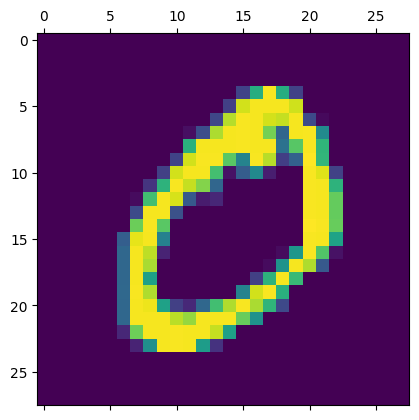

In [5]:
plt.matshow(X_train[1])

In [6]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8190 - loss: 0.7130
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9135 - loss: 0.3107
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9219 - loss: 0.2816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9262 - loss: 0.2672
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9262 - loss: 0.2690


In [10]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9145 - loss: 0.3017


[0.2663658559322357, 0.9254000186920166]

In [11]:
y_pred = model.predict(X_test_flattened)
y_pred[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.36215845e-02, 3.65698270e-07, 4.16755714e-02, 9.38971102e-01,
       1.64971850e-03, 7.33856633e-02, 1.11938584e-06, 9.99721587e-01,
       6.86032698e-02, 5.27161479e-01], dtype=float32)

In [12]:
np.argmax(y_pred[0])

7

In [13]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [14]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [15]:
tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,   10,  918,   15,    6,    5,   12,   10,   47,    5],
       [   2,    0,   19,  917,    0,   24,    2,   11,   27,    8],
       [   1,    1,    5,    2,  910,    0,   10,    4,   10,   39],
       [   8,    3,    4,   35,    8,  773,   11,    7,   37,    6],
       [   9,    3,   10,    1,    7,   17,  906,    2,    3,    0],
       [   1,    8,   23,    5,    7,    1,    0,  950,    3,   30],
       [   6,   12,    5,   17,    9,   20,    9,   11,  880,    5],
       [  10,    7,    1,    9,   22,    6,    0,   24,   11,  919]])>

<AxesSubplot:>

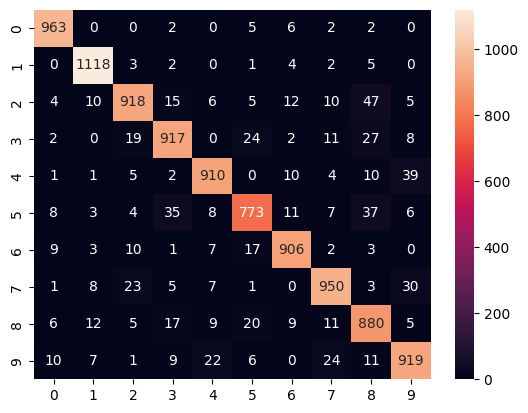

In [16]:
import seaborn as sns
sns.heatmap(tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels),annot=True,fmt='d')

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8693 - loss: 0.4528
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9613 - loss: 0.1319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9753 - loss: 0.0835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9815 - loss: 0.0626
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9852 - loss: 0.0502


In [18]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9712 - loss: 0.0965


[0.08077441155910492, 0.975600004196167]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<AxesSubplot:>

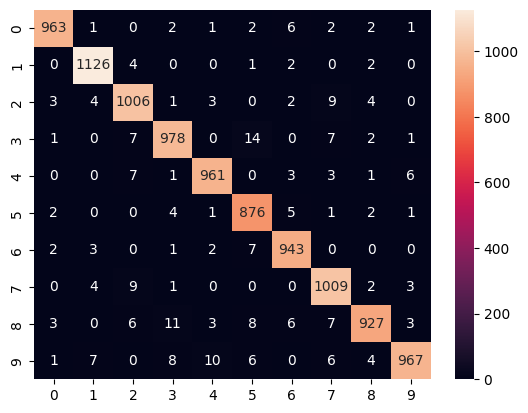

In [19]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)
sns.heatmap(tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels),annot=True,fmt='d')

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=5)

C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8685 - loss: 0.4681
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9608 - loss: 0.1392
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9731 - loss: 0.0924
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9793 - loss: 0.0695
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0530
